- The thing that I missed since: some tree models allow multiclass split as well. The one that I used mostly in 2018 was CART model from *cart* package in R which does only the binary splits. 

In [26]:
import sklearn as sk
linnerud_DB = sk.datasets.load_linnerud()
linnerud_DB.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])

In [35]:
import numpy as np
table_linnerud = pd.DataFrame(np.concatenate((linnerud_DB.data, linnerud_DB.target), axis=1),
                              columns = linnerud_DB['feature_names']+linnerud_DB['target_names'])
print(table_linnerud.info())
print(table_linnerud.describe())
print(table_linnerud.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB
None
           Chins      Situps      Jumps      Weight      Waist      Pulse
count  20.000000   20.000000   20.00000   20.000000  20.000000  20.000000
mean    9.450000  145.550000   70.30000  178.600000  35.400000  56.100000
std     5.286278   62.566575   51.27747   24.690505   3.201973   7.210373
min     1.000000   50.000000   25.00000  138.000000  31.000000  46.000000
25%     4.750000  101.000000   39.50000  160.750000  33.000000  51.500000
50%    11.500000  122.500000   54.00000  176.000000  35.000000  55.000000
75%    13.250000  210.000000   85.25000

<Axes: >

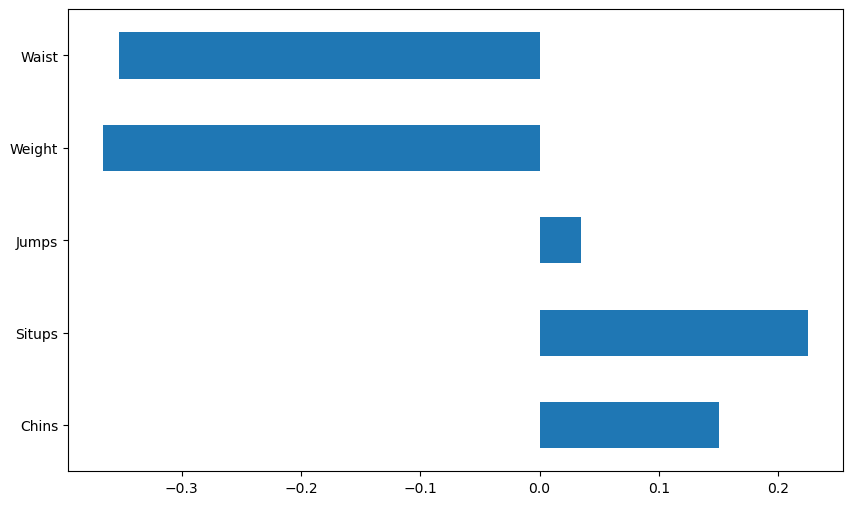

In [37]:
# We predict PULSE here, wanna see its correlation to other variables

correlation_values = table_linnerud.corr()['Pulse'].drop('Pulse')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [39]:
## Preprocessing dataset 
# (numerizing labels if necessary)


from sklearn.preprocessing import StandardScaler

y = table_linnerud[['Pulse']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = table_linnerud.drop(['Pulse'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X_norm = StandardScaler().fit(X).transform(X)

In [41]:
# Data split Train vs. Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [49]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

In [62]:
dt_reg.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 35,
 'splitter': 'best'}

In [45]:
from sklearn.metrics import mean_squared_error

# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 124.667
R^2 score : -0.818
